# Decision Tree For Deseases

A decisions tree to find an illness depending on the symptomes. It covers only child related deseases.
Sorry, the symptoms are all in German, it is my mother tongue, and I was lazy to look for an English translation;-)

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

First we'll load our data of symptoms for an illness:

In [2]:
input_file = "datasets/symptome.csv"
df = pd.read_csv(input_file, header = 0, sep=';')
df

,Krankheit,Atemnot,Appetitlosigkeit,Bauchschmerzen,Bindehautentzündung,Erbrechen,Fieber,Gliederschmerzen,Hautroetungen,Hautausschlaege,...,Kopfschmerzen,Laehmung/Bewustlosigkeit,Lymphknotenschwellung,Mandelbelag,Meningitis,Mundgeruch,Flecken auf der Mundschleimhaut,Schlafstoerungen,Schnupfen,Schweissausbrueche
0,Diphterie,ja,NaN,ja,NaN,ja,ja,ja,NaN,NaN,...,NaN,NaN,NaN,ja,NaN,faulig,NaN,NaN,NaN,NaN
1,Dreitagefieber,NaN,NaN,NaN,NaN,ja,sehr hoch,NaN,ja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Keuchhusten,ja,ja,NaN,NaN,ja,ja,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ja,NaN,NaN
3,Kinderlaehmung,NaN,NaN,NaN,NaN,ja,ja,ja,NaN,NaN,...,ja,ja,NaN,NaN,ja,NaN,NaN,NaN,NaN,ja
4,Masern,NaN,NaN,NaN,ja,NaN,ja,NaN,ja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ja,NaN,ja,NaN
5,Mumps,NaN,ja,ja,NaN,ja,NaN,NaN,NaN,NaN,...,ja,NaN,ja,ja,ja,NaN,NaN,NaN,NaN,NaN
6,Roeteln,NaN,NaN,NaN,NaN,NaN,ja,NaN,ja,NaN,...,NaN,NaN,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Scharlach,NaN,NaN,NaN,NaN,NaN,ja,NaN,NaN,ja,...,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Windpocken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flecken und Blaeschen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map those values to floating point numbers between 0 and 1.

In [3]:
d = {'ja': 1, 'sehr hoch': 1.5, 'Flecken und Blaeschen': 1.5,'faulig': 1, 'nein': 0, 'vielleicht': 0.5, np.nan: 0}

def mapping(x):
    if x in d:
        return d[x]
    return x

df = df.applymap(lambda x: mapping(x))

df.head()

,Krankheit,Atemnot,Appetitlosigkeit,Bauchschmerzen,Bindehautentzündung,Erbrechen,Fieber,Gliederschmerzen,Hautroetungen,Hautausschlaege,...,Kopfschmerzen,Laehmung/Bewustlosigkeit,Lymphknotenschwellung,Mandelbelag,Meningitis,Mundgeruch,Flecken auf der Mundschleimhaut,Schlafstoerungen,Schnupfen,Schweissausbrueche
0,Diphterie,1,0,1,0,1,1.0,1,0,0.0,...,0,0,0,1,0,1,0,0,0,0
1,Dreitagefieber,0,0,0,0,1,1.5,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Keuchhusten,1,1,0,0,1,1.0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,Kinderlaehmung,0,0,0,0,1,1.0,1,0,0.0,...,1,1,0,0,1,0,0,0,0,1
4,Masern,0,0,0,1,0,1.0,0,1,0.0,...,0,0,0,0,0,0,1,0,1,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [4]:
features = list(df.columns[1:])
features

['Atemnot',
 'Appetitlosigkeit',
 'Bauchschmerzen',
 'Bindehautentzündung',
 'Erbrechen',
 'Fieber',
 'Gliederschmerzen',
 'Hautroetungen',
 'Hautausschlaege',
 'Halsschmerzen',
 'Heiserkeit',
 'Husten',
 'Juckreiz',
 'Kopfschmerzen',
 'Laehmung/Bewustlosigkeit',
 'Lymphknotenschwellung',
 'Mandelbelag',
 'Meningitis',
 'Mundgeruch',
 'Flecken auf der Mundschleimhaut',
 'Schlafstoerungen',
 'Schnupfen',
 'Schweissausbrueche']

Now actually construct the decision tree:

In [5]:
y = df['Krankheit']
X = df[features]
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X,y)

... and display it. 

Note: you need to have pyplot2 installed for this to work. As well as graphviz should be available in your path. For mac you can use homebrew to install it: brew install graphviz

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value.

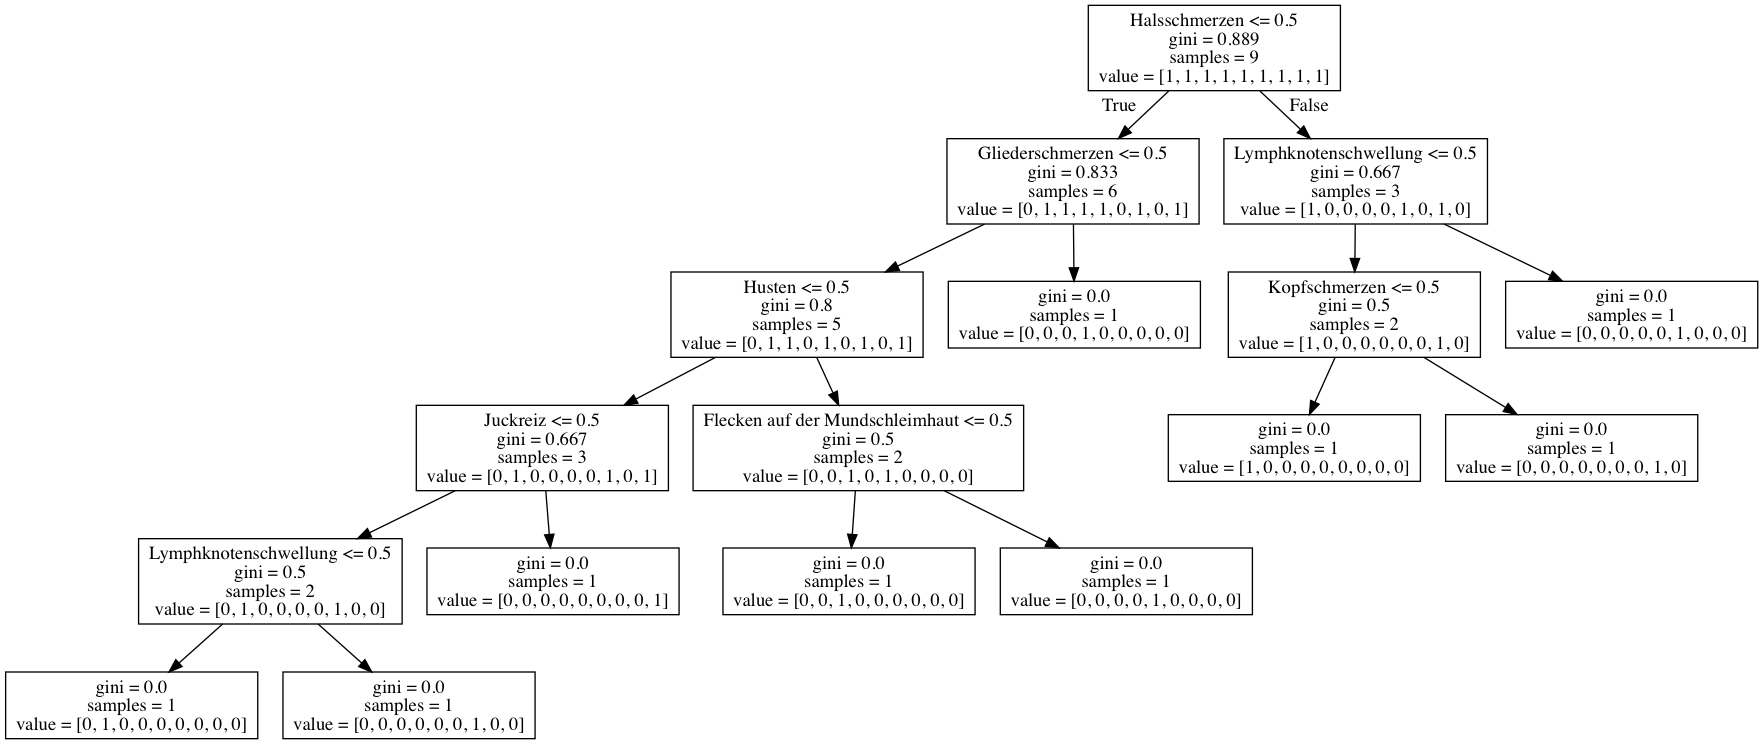

In [6]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)   
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Return desease depending on the input vector

Use a vector to predict the illness:

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#fills up the sequence with zeros and predict
def predict(v):
    l = len(v)
    if  l < 23:
        n = np.zeros(23-l).tolist()
        v = v + n

    print(clf.predict([v]))
    
#Diphterie
predict([1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1])

#Mumps
predict([0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1])

#Windpocken
predict([0,0,0,0,0,0,0,0,1.5,0,0,1])


['Diphterie']
['Mumps']
['Windpocken']
